In [1]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt 
import numpy as np 

from sklearn.preprocessing import MinMaxScaler # chuẩn hóa dữ liệu
from keras.callbacks import ModelCheckpoint # huấn luyện elm nó 
from tensorflow.keras.models import load_model # type: ignore # tải lại mohinh
#các lớp để xây dựng mô hình
from keras.models import Sequential # dauvao
from keras.layers import LSTM #hoc phu thuoc 
from keras.layers import Dropout# tranh hoc tu
from keras.layers import Dense #daura
#kiểm tra độ trính xác của mohinh
from sklearn.metrics import r2_score # check đồ phù hợp 0||1
from sklearn.metrics import mean_absolute_error # độ lệch tuyệt đối| gtr dự đoán và thực tế.
from sklearn.metrics import mean_absolute_percentage_error # tính tỷ lệ phần trăm trung bình

In [2]:
# dọc dữ liệu 
df = pd.read_csv(r'C:\Users\DELL\Downloads\file_tiuluan\VN_30_HCM.csv')

In [3]:
df['Date']= pd.to_datetime(df['Date'],format="%m/%d/%Y")

In [4]:
# kich thươc
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-04-26,1240.50,1227.69,1245.52,1225.55,188.65K,0.55%
1,2024-04-25,1233.72,1235.25,1236.99,1226.76,157.69K,0.13%
2,2024-04-24,1232.17,1210.05,1234.87,1207.92,215.46K,2.65%
3,2024-04-23,1200.37,1207.76,1213.96,1191.61,252.38K,-0.52%
4,2024-04-22,1206.64,1204.41,1214.24,1200.15,189.96K,1.06%
...,...,...,...,...,...,...,...
1058,2020-02-05,845.31,845.65,854.72,840.41,63.59K,-0.02%
1059,2020-02-04,845.52,842.79,849.80,833.93,73.13K,0.34%
1060,2020-02-03,842.67,848.42,848.42,803.73,91.77K,-0.70%
1061,2020-01-31,848.63,875.43,876.59,848.63,83.27K,-3.10%


In [5]:
# xac dinh kieu du lieu 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1063 non-null   datetime64[ns]
 1   Price     1063 non-null   float64       
 2   Open      1063 non-null   float64       
 3   High      1063 non-null   float64       
 4   Low       1063 non-null   float64       
 5   Vol.      1063 non-null   object        
 6   Change %  1063 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 58.3+ KB


In [6]:
# mo ta bo du lieu
df.describe()

,Price,Open,High,Low
count,1063.000000,1063.000000,1063.000000,1063.00000
mean,1161.057526,1161.227394,1170.074553,1150.91682
std,236.775569,237.234146,237.920106,236.22487
min,610.760000,609.350000,629.080000,598.60000
25%,1029.265000,1028.650000,1038.655000,1012.78000
50%,1163.660000,1164.380000,1169.890000,1154.29000
75%,1319.205000,1313.645000,1330.730000,1304.13500
max,1572.460000,1576.520000,1587.000000,1567.67000


In [7]:
# B4 : tiền xu ly du lieu 
# lay du lieu 
dfl= pd.DataFrame(df,columns=['Date','Price'])
dfl.index = dfl.Date
dfl.drop('Date',axis=1,inplace=True) # mo ta bo du lieu

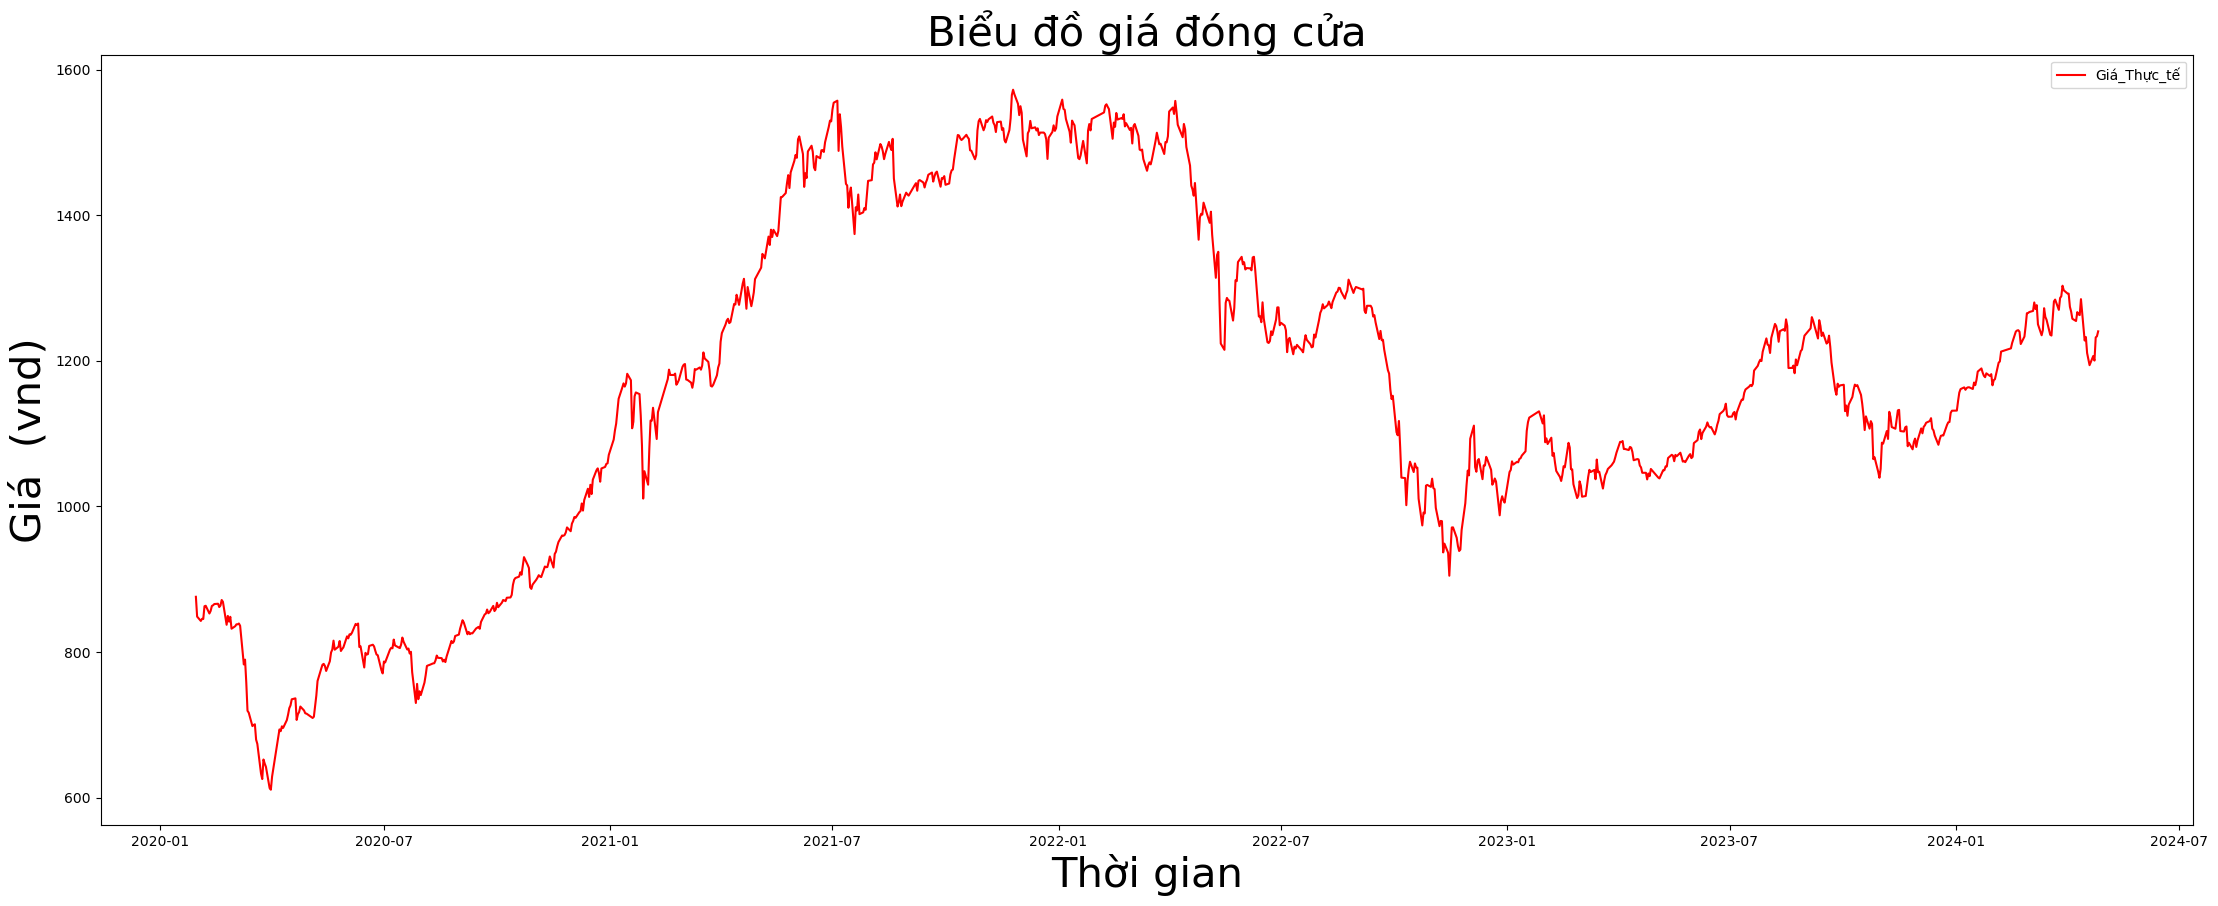

In [8]:
# ve bieu do 
plt.figure(figsize=(27,10))
plt.plot(dfl['Price'],label='Giá_Thực_tế',color='red')# bieu do
plt.title('Biểu đồ giá đóng cửa', fontsize=30) # name
plt.xlabel('Thời gian', fontsize=30)# dat name ham x
plt.ylabel('Giá  (vnd)', fontsize=30)# dat ten ham y
plt.legend()# chú thích
plt.show()

In [9]:
dfl

,Price
Date,
2024-04-26,1240.50
2024-04-25,1233.72
2024-04-24,1232.17
2024-04-23,1200.37
2024-04-22,1206.64
...,...
2020-02-05,845.31
2020-02-04,845.52
2020-02-03,842.67


In [10]:
# chia tập dữ liệu thành 2
data_duni = dfl.values
train_data = data_duni[:1000]
test_data = data_duni[1000:]

In [11]:
data_duni

array([[1240.5 ],
       [1233.72],
       [1232.17],
       ...,
       [ 842.67],
       [ 848.63],
       [ 875.82]])

In [12]:

# chuẩn hóa dữ liệu 
# Áp dụng MinMaxScaler lên data_duni
sc = MinMaxScaler(feature_range=(0,1))
sc_train = sc.fit_transform(data_duni)


In [13]:
#tạo vòng lặp các giá trị
x_train, y_train= [],[]
for i in range(50,len(train_data)):
    x_train.append(sc_train[i-50:i,0])
    y_train.append(sc_train[i,0])

In [14]:
x_train

[array([0.65481959, 0.64776957, 0.64615785, 0.6130914 , 0.61961111,
        0.60649891, 0.62387439, 0.64670895, 0.64171779, 0.70082146,
        0.67807008, 0.67906832, 0.68229177, 0.66960591, 0.67278777,
        0.68305085, 0.68993449, 0.70868254, 0.70901529, 0.71346574,
        0.72001664, 0.70501196, 0.7023708 , 0.68549444, 0.70019757,
        0.69752522, 0.67411875, 0.6488302 , 0.64987002, 0.67137361,
        0.67542893, 0.68786524, 0.65661849, 0.64922533, 0.6649059 ,
        0.69231569, 0.68660705, 0.69606946, 0.68396589, 0.68244775,
        0.68107518, 0.68065925, 0.6625247 , 0.64734325, 0.63671623,
        0.6541957 , 0.65646251, 0.65601539, 0.65450764, 0.63822398]),
 array([0.64776957, 0.64615785, 0.6130914 , 0.61961111, 0.60649891,
        0.62387439, 0.64670895, 0.64171779, 0.70082146, 0.67807008,
        0.67906832, 0.68229177, 0.66960591, 0.67278777, 0.68305085,
        0.68993449, 0.70868254, 0.70901529, 0.71346574, 0.72001664,
        0.70501196, 0.7023708 , 0.68549444, 0.

In [15]:
y_train

[0.6305084745762711,
 0.6259124467089529,
 0.611843610273474,
 0.609961526463554,
 0.5864614744722886,
 0.5849953207861077,
 0.5776957471144847,
 0.5936882603722574,
 0.5910471040865134,
 0.5948424664656337,
 0.5893313923260891,
 0.5913382551731309,
 0.595913486534262,
 0.6018508890506394,
 0.5973484454611625,
 0.5855776229593429,
 0.5779868982011022,
 0.5817094728085682,
 0.5724654258084642,
 0.5749194135385255,
 0.5748154310075907,
 0.5739003847353644,
 0.5713320162212748,
 0.5747738379952169,
 0.5722990537589686,
 0.5673390870333782,
 0.555360299469689,
 0.5416242071332017,
 0.541437038577519,
 0.5383695539149423,
 0.5252989497764377,
 0.5248622231465113,
 0.5210564625142974,
 0.5060725798065925,
 0.5060517833004056,
 0.5056150566704792,
 0.5002703545804305,
 0.49278361235312473,
 0.5060205885411252,
 0.5133929499844027,
 0.5158261412082769,
 0.5307788291567016,
 0.5267547052095246,
 0.5242071332016222,
 0.5205261516065299,
 0.5183633149630861,
 0.5091608609753563,
 0.51616928356036

In [16]:
# xep du lieu thanh 1
x_train = np.array(x_train)
y_train = np.array(y_train)
# xep lại du lieu  thanh mang 1 chieu 
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train = np.reshape(y_train,(y_train.shape[0],1))

In [17]:
# bước 5 
# xay dung , huấn luyện mo hinh 
model = Sequential()
model.add(LSTM(units=128,input_shape=(x_train.shape[1],1),return_sequences=True))
model.add(LSTM(units=64))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss= 'mean_absolute_error',optimizer='adam')

f:\Tools\Tool_anconda\tool_run\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
# huấn luyện Mô hình AI 
save_model ="save_duni.keras"
best_model = ModelCheckpoint(save_model,monitor='loss',verbose =2,save_best_only = True, mode ='auto')
model.fit(x_train,y_train, epochs=100, batch_size=50,verbose=2, callbacks= [best_model])


Epoch 1/1000

Epoch 1: loss improved from inf to 0.18934, saving model to save_duni.keras
19/19 - 16s - 858ms/step - loss: 0.1893
Epoch 2/1000

Epoch 2: loss improved from 0.18934 to 0.09787, saving model to save_duni.keras
19/19 - 3s - 151ms/step - loss: 0.0979
Epoch 3/1000

Epoch 3: loss improved from 0.09787 to 0.07936, saving model to save_duni.keras
19/19 - 2s - 120ms/step - loss: 0.0794
Epoch 4/1000

Epoch 4: loss improved from 0.07936 to 0.07500, saving model to save_duni.keras
19/19 - 3s - 150ms/step - loss: 0.0750
Epoch 5/1000

Epoch 5: loss improved from 0.07500 to 0.07302, saving model to save_duni.keras
19/19 - 2s - 128ms/step - loss: 0.0730
Epoch 6/1000

Epoch 6: loss did not improve from 0.07302
19/19 - 3s - 170ms/step - loss: 0.0744
Epoch 7/1000

Epoch 7: loss improved from 0.07302 to 0.07224, saving model to save_duni.keras
19/19 - 2s - 108ms/step - loss: 0.0722
Epoch 8/1000

Epoch 8: loss improved from 0.07224 to 0.06961, saving model to save_duni.keras
19/19 - 4s - 19

In [19]:
y_train= sc.inverse_transform(y_train)
final_model = load_model('save_duni.keras')
y_train_predict = final_model.predict(x_train)
y_train_predict = sc.inverse_transform(y_train_predict)

30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step


In [20]:
test = dfl[len(train_data)-50:].values
test = test.reshape(-1,1)
sc_test = sc.transform(test)
#
x_test = []
for i in range(50,test.shape[0]):
    x_test .append(sc_test[i-50:i,0])
x_test = np.array(x_test)
x_test = np.reshape (x_test,(x_test.shape[0],x_test.shape[1],1))
#
y_test = data_duni[1000:]# gia thuc 
y_test_predict = final_model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


C:\Users\DELL\AppData\Local\Temp\ipykernel_7300\1692486014.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_datal['dự đoán'] = y_train_predict# them du lieu
C:\Users\DELL\AppData\Local\Temp\ipykernel_7300\1692486014.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_datal['dự đoán'] = y_test_predict# them du lieu


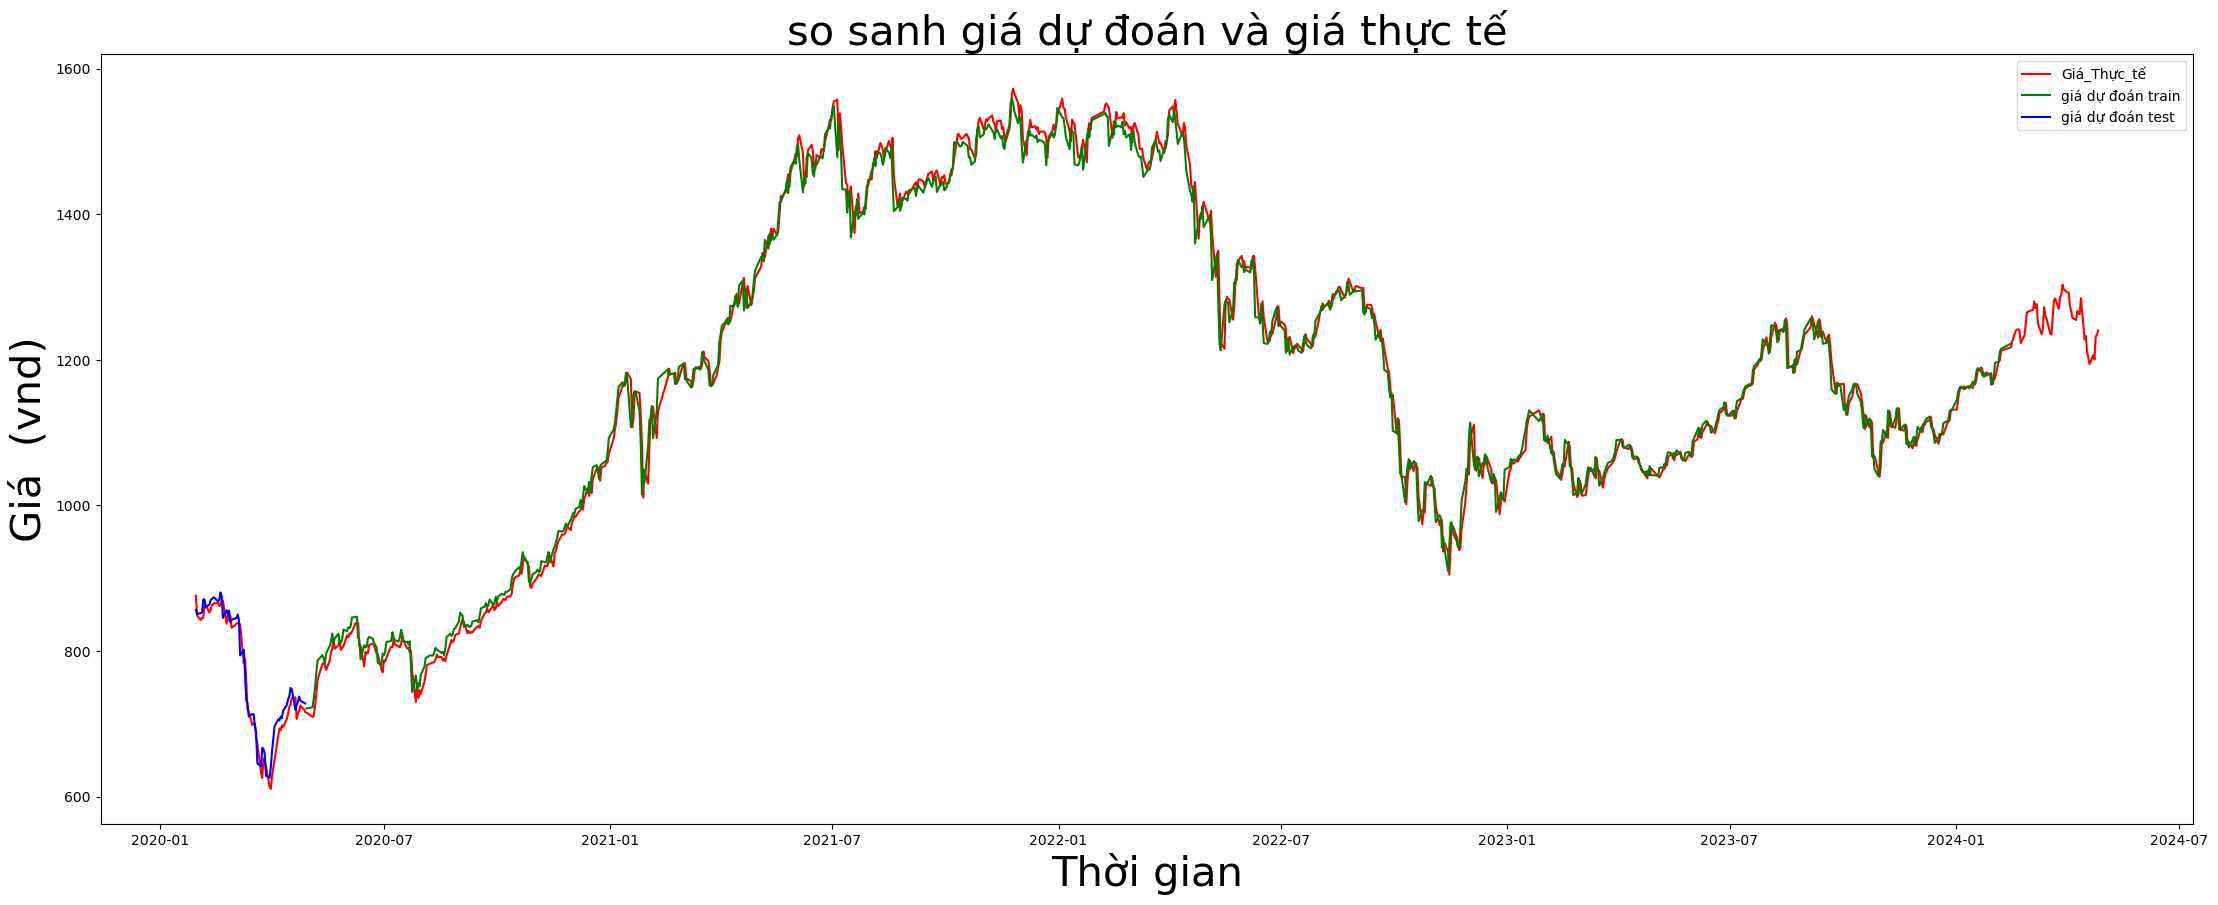

In [22]:
# độ chính xác 
# lập biểu đồ so sanh 
train_datal= dfl[50:1000]
test_datal = dfl[1000:]
#
plt.figure(figsize=(27,10))
plt.plot(dfl,label='Giá_Thực_tế',color='red')# bieu do
#
train_datal['dự đoán'] = y_train_predict# them du lieu
plt.plot(train_datal['dự đoán'],label='giá dự đoán train',color='green')
#
test_datal['dự đoán'] = y_test_predict# them du lieu
plt.plot(test_datal['dự đoán'],label='giá dự đoán test',color='blue')

plt.title('so sanh giá dự đoán và giá thực tế', fontsize=30) # name
plt.xlabel('Thời gian', fontsize=30)# dat name ham x
plt.ylabel('Giá  (vnd)', fontsize=30)# dat ten ham y
plt.legend()# chú thích
plt.show()

In [23]:
# r2
print('độ phù hợp  tập train :',r2_score(y_train,y_train_predict))
# mae
print('sai số tuyệt đố trung bình tập train :',mean_absolute_error(y_train,y_train_predict))
# mape
print('phần trăm sai số tuyệt đối trung bình tập train :', mean_absolute_percentage_error(y_train,y_train_predict))

độ phù hợp  tập train : 0.9940021758769501
sai số tuyệt đố trung bình tập train : 12.731811929481907
phần trăm sai số tuyệt đối trung bình tập train : 0.011049710357569586


In [24]:
train_datal

,Price,dự đoán
Date,,
2024-02-15,1217.12,1222.309082
2024-02-07,1212.70,1215.057861
2024-02-06,1199.17,1210.929810
2024-02-05,1197.36,1197.432373
2024-02-02,1174.76,1195.643921
...,...,...
2020-05-07,739.98,770.175415
2020-05-06,725.94,749.863708
2020-05-05,711.01,736.245178


In [25]:
# r2
print('độ phù hợp  tập test :',r2_score(y_test,y_test_predict))
# mae
print('sai số tuyệt đố trung bình tập test :',mean_absolute_error(y_test,y_test_predict))
# mape
print('phần trăm sai số tuyệt đối trung bình tập test :', mean_absolute_percentage_error(y_test,y_test_predict))

độ phù hợp  tập test : 0.9559179616476531
sai số tuyệt đố trung bình tập test : 14.994994148375504
phần trăm sai số tuyệt đối trung bình tập test : 0.020497848471651595


In [26]:
test_datal

,Price,dự đoán
Date,,
2020-04-28,715.74,727.946533
2020-04-27,719.66,728.831421
2020-04-24,725.05,731.811523
2020-04-23,717.49,737.303528
2020-04-22,714.42,730.109680
...,...,...
2020-02-05,845.31,870.874817
2020-02-04,845.52,852.732666
2020-02-03,842.67,852.015991
